In [29]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-09-02 21:14:24--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  77.1MB/s    in 0.8s    

2019-09-02 21:14:25 (77.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [32]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.589.jpg', 'cat.687.jpg', 'cat.734.jpg', 'cat.465.jpg', 'cat.335.jpg', 'cat.714.jpg', 'cat.273.jpg', 'cat.697.jpg', 'cat.939.jpg', 'cat.878.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [33]:
print('total training cat images:', len(os.listdir(train_cats_dir))) 
print('total training dog images:', len(os.listdir(train_dogs_dir))) 
print('total validation cat images:', len(os.listdir(validation_cats_dir))) 
print('total validation dog images:', len(os.listdir(validation_dogs_dir))) 

#length of training and validation sets

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

#4x4 config for images

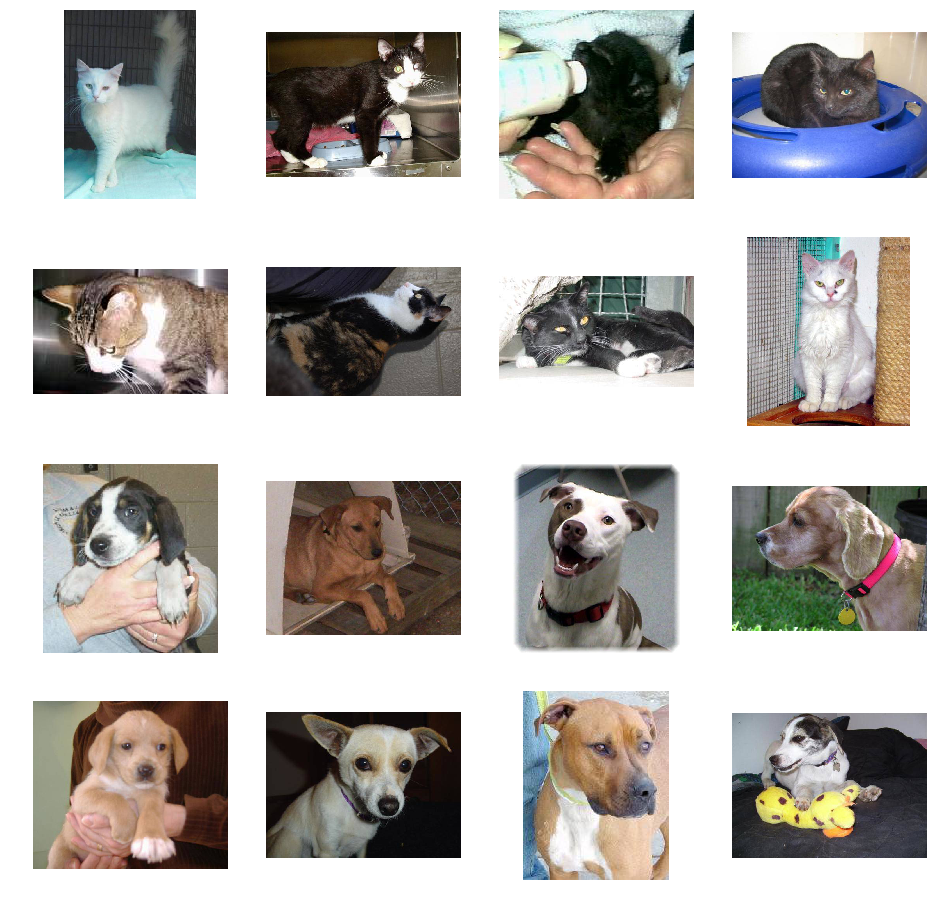

In [35]:

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 10
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]




next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
# Load some neural network functions we'll be using.
#method for creating cnn (3 conv, 3 pooling, flatten)

from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(150, 150, 3))

#filters 
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
#dominant features extraction-max pooling 

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)



In [37]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0   

In [0]:
#model for loss and optimizer function passed in (like optimizer)

from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['acc'])

In [39]:
#flows training images in batches of 20 at a time 
#resizes them to 0 to 1 range 


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size = (150, 150),  # All images will be resized to 150x150
        batch_size = 20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode = 'binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
#put generator into the fit_generator, which takes a generator as input, as well as a number of steps 

history = model.fit_generator(
      train_generator,
      steps_per_epoch = 100,  # 2000 images = batch_size * steps
      epochs = 15,
      validation_data = validation_generator,
      validation_steps = 50,  # 1000 images = batch_size * steps
      verbose = 2)

Epoch 1/15
100/100 - 60s - loss: 0.8581 - acc: 0.5500 - val_loss: 0.6590 - val_acc: 0.6580
Epoch 2/15
100/100 - 59s - loss: 0.6371 - acc: 0.6555 - val_loss: 0.6019 - val_acc: 0.6810
Epoch 3/15
100/100 - 59s - loss: 0.5405 - acc: 0.7345 - val_loss: 0.6099 - val_acc: 0.6780
Epoch 4/15
100/100 - 59s - loss: 0.4640 - acc: 0.7840 - val_loss: 0.5719 - val_acc: 0.7280
Epoch 5/15
100/100 - 59s - loss: 0.3776 - acc: 0.8320 - val_loss: 0.6166 - val_acc: 0.7190
Epoch 6/15
100/100 - 59s - loss: 0.2861 - acc: 0.8730 - val_loss: 0.7370 - val_acc: 0.7030
Epoch 7/15
100/100 - 59s - loss: 0.2246 - acc: 0.9095 - val_loss: 0.8243 - val_acc: 0.7130
Epoch 8/15
100/100 - 59s - loss: 0.1397 - acc: 0.9415 - val_loss: 1.0750 - val_acc: 0.6930
Epoch 9/15
100/100 - 59s - loss: 0.1010 - acc: 0.9640 - val_loss: 1.2774 - val_acc: 0.7020
Epoch 10/15
100/100 - 59s - loss: 0.0905 - acc: 0.9745 - val_loss: 1.3813 - val_acc: 0.7150
Epoch 11/15
100/100 - 59s - loss: 0.0591 - acc: 0.9825 - val_loss: 1.5897 - val_acc: 0.71

15


Text(0.5, 1.0, 'Training and validation loss')

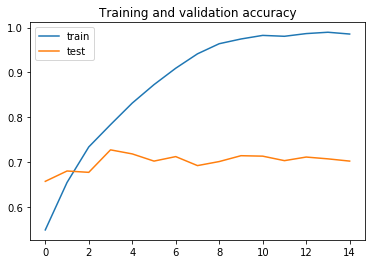

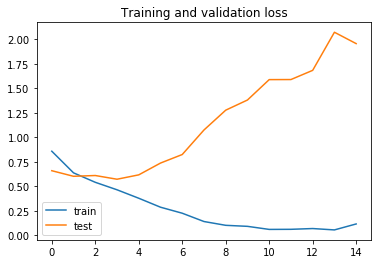

In [41]:

#accuracy results and training/validation loss

# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))
#print(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['train', 'test'], loc='upper left')
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['train', 'test'], loc='lower left')
plt.title('Training and validation loss')

In [46]:
from google.colab import files
uploaded = files.upload()

In [66]:
import numpy as np
from keras.preprocessing import image

def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
    
  return list(uploaded.keys())

#upload_files()

#_my_file = ['dogpic.jpeg']

test_image = image.load_img('dog-cat.jpeg', target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)


if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
  
print(prediction)


dog
